In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## Разбиение данных на выборки

Разделите исходные данные на обучающую, валидационную и тестовую выборки.

In [52]:
df.shape

(3214, 5)

In [53]:
df_valid, df_train = train_test_split(df, test_size= 0.7, random_state=12345)

df_test, df_valid = train_test_split(df_valid, test_size=0.5, random_state = 12345)

print('Размер валидационной выборки:', df_valid.shape)
print('Размер обучающей выборки:', df_train.shape)
print('Размер тестовой выборки:', df_test.shape)


Размер валидационной выборки: (482, 5)
Размер обучающей выборки: (2250, 5)
Размер тестовой выборки: (482, 5)


## Исследование моделей

Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.

In [54]:
features_train = df_train.drop(['is_ultra'], axis = 1)
target_train = df_train['is_ultra']
features_test = df_test.drop(['is_ultra'], axis = 1)
target_test = df_test['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis = 1)
target_valid = df_valid['is_ultra']

##### Решающее дерево

In [55]:
max_depth_valid = []
accuracy_valid = []
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    max_depth_valid.append(depth)
    accuracy_valid.append(accuracy_score(target_valid,predictions_valid))
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(target_valid,predictions_valid))

max_depth = 1 : 0.7468879668049793
max_depth = 2 : 0.7697095435684648
max_depth = 3 : 0.7883817427385892
max_depth = 4 : 0.7800829875518672
max_depth = 5 : 0.7780082987551867


In [56]:
max_depth_train = []
accuracy_train = []
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train,target_train)
    predictions_train = model.predict(features_train)
    max_depth_train.append(depth)
    accuracy_train.append(accuracy_score(target_train,predictions_train))

Перебираем глубину дерева для повышения качества модели. Самая высокая точность при глубине, равной 3.
Проверим, не случилось ли при этом переобучения.

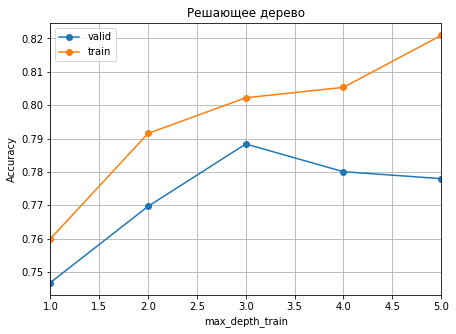

In [57]:
graphic_valid = pd.DataFrame()
graphic_valid['max_depth_valid'] = max_depth_valid
graphic_valid['accuracy_valid'] = accuracy_valid

graphic_train = pd.DataFrame()
graphic_train['max_depth_train'] = max_depth_train
graphic_train['accuracy_train'] = accuracy_train

fig, axs = plt.subplots(1,1, figsize = (7,5))
plt.ylabel('Accuracy')
graphic_valid.plot(ax = axs, x = 'max_depth_valid', y = 'accuracy_valid', style = '-o', grid = True, label = 'valid', title = 'Решающее дерево')
graphic_train.plot(ax = axs, x = 'max_depth_train', y = 'accuracy_train', style = '-o', grid = True, label = 'train', title = 'Решающее дерево')
plt.legend()

Судя по тому, что начиная со значения 3, accuracy обучающей выборки продолжает расти, а валидационной убывать - модель переобучилась.

##### Лес деревьев

Переберем кол-во деревьев в лесу для улучшения результатов предсказания:

In [58]:
estimators_valid = []
score_valid = []
for estimate in range(1,11):
    model = RandomForestClassifier(random_state = 1234, n_estimators = estimate)
    model.fit(features_train,target_train)
    model.predict(features_valid)
    estimators_valid.append(estimate)
    score_valid.append(model.score(features_valid,target_valid))
    print('Estimators n = ',estimate, 'Accuracy = ',model.score(features_valid,target_valid))
    #првоерка при каком количестве деревьер метрика будет более точная

Estimators n =  1 Accuracy =  0.7095435684647303
Estimators n =  2 Accuracy =  0.7489626556016598
Estimators n =  3 Accuracy =  0.7614107883817427
Estimators n =  4 Accuracy =  0.7634854771784232
Estimators n =  5 Accuracy =  0.7883817427385892
Estimators n =  6 Accuracy =  0.7842323651452282
Estimators n =  7 Accuracy =  0.7904564315352697
Estimators n =  8 Accuracy =  0.7925311203319502
Estimators n =  9 Accuracy =  0.7904564315352697
Estimators n =  10 Accuracy =  0.7925311203319502


In [59]:
estimators_train = []
score_train = []
for estimate in range(1,11):
    model = RandomForestClassifier(random_state = 1234, n_estimators = estimate)
    model.fit(features_train,target_train)
    model.predict(features_train)
    estimators_train.append(estimate)
    score_train.append(model.score(features_train,target_train))

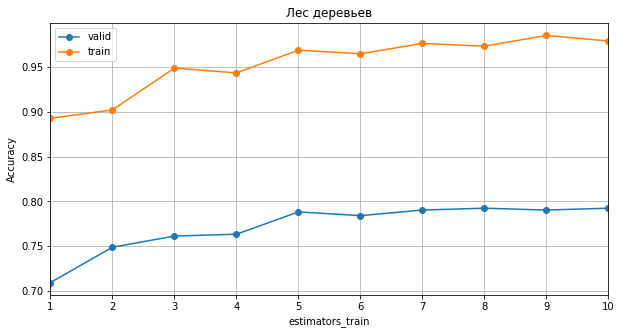

In [60]:
graphic_valid = pd.DataFrame()
graphic_valid['estimators_valid'] = estimators_valid
graphic_valid['score_valid'] = score_valid

graphic_train = pd.DataFrame()
graphic_train['estimators_train'] = estimators_train
graphic_train['score_train'] = score_train

fig, axs = plt.subplots(1,1, figsize = (10,5))
plt.ylabel('Accuracy')
graphic_valid.plot(ax = axs, x = 'estimators_valid', y = 'score_valid', style = '-o', grid = True, label = 'valid', title = 'Лес деревьев')
graphic_train.plot(ax = axs, x = 'estimators_train', y = 'score_train', style = '-o', grid = True, label = 'train', title = 'Лес деревьев')
plt.legend()

В данном случае, судя по высокому accuracy на обучающей выборке и значительно ниже на валидационной, модель недообучилась.


## Проверка моделей на тестовой выборке

Оставляем случайный лес с восмью деревьями:

In [63]:
model = RandomForestClassifier(random_state = 1234, n_estimators = 8) #создали дерево для обучения
model.fit(features_train,target_train)
predictions = model.predict(features_test)
print('Accuracy тестовой выборки:', accuracy_score(target_test,predictions))

Accuracy тестовой выборки: 0.7821576763485477


## Проверка модели на адекватность 

In [62]:
features = df.drop(['is_ultra'], axis = 1)
true_target = df['is_ultra']
target = []

for i in range(len(df['is_ultra'])):
    target.append(0)


model = RandomForestClassifier(random_state = 1234, n_estimators = 3) #создали дерево для обучения
model.fit(features,true_target)
predictions = model.predict(features)
print('Accuracy проверки модели на адекватность:', accuracy_score(target,predictions))  


Accuracy проверки модели на адекватность: 0.7031736154324829
